In [1]:
import pandas as pd
from sklearn.feature_selection import SelectFdr, f_classif

from utils.norm_test import *
from utils.general import *
from utils.pre_process import *

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [3]:
data_path = catchPath('data/BankChurners.csv')
data_path

'/ML/data/BankChurners.csv'

In [4]:
data = pd.read_csv(data_path)
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


Data dictionary
1. CLIENTNUM: Client number. Unique identifier for the customer holding the account. Categorical nominal.
2. Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0. Categorical binary.
3. Customer_Age: Demographic variable - Customer's Age in Years. Numerical discrete.
4. Gender: Demographic variable - M=Male, F=Female. Categorical nominal.
5. Dependent_count: Demographic variable - Number of dependents. Numerical discrete.
6. Education_Level: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.). Categorical ordinal.
7. Marital_Status: Demographic variable - Married, Single, Divorced, Unknown. Categorical nominal.
8. Income_Category: Demographic variable - Annual Income Category of the account holder (<
40K - 60K, 80K, 120K, >.). Categorical ordinal.
9. Card_Category: Product Variable - Type of Card (Blue, Silver, Gold, Platinum). Categorical ordinal.
10. Months_on_book: Period of relationship with bank. Numerical discrete.
11. Total_Relationship_Count: Total no. of products held by the customer. Numerical discrete.
12. Months_Inactive_12_mon: No. of months inactive in the last 12 months. Numerical discrete.
13. Contacts_Count_12_mon: No. of Contacts in the last 12 months. Numerical discrete.
14. Credit_Limit: Credit Limit on the Credit Card. Numerical continuous.
15. Total_Revolving_Bal: Total Revolving Balance on the Credit Card. Numerical discrete.
16. Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months). Numerical continuous.
17. Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1). Numerical continuous.
18. Total_Trans_Amt: Total Transaction Amount (Last 12 months). Numerical discrete.
19. Total_Trans_Ct: Total Transaction Count (Last 12 months). Numerical discrete.
20. Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1). Numerical continuous.
21. Avg_Utilization_Ratio: Average Card Utilization Ratio. Numerical continuous.

In [5]:
data.shape

(10127, 23)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

### checking null values

In [7]:
data.isnull().any()

CLIENTNUM                                                                                                                             False
Attrition_Flag                                                                                                                        False
Customer_Age                                                                                                                          False
Gender                                                                                                                                False
Dependent_count                                                                                                                       False
Education_Level                                                                                                                       False
Marital_Status                                                                                                                        False
Income_Category     

In [8]:
#select columns
col = ['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

In [9]:
df = pd.DataFrame(data[col])
df.shape

(10127, 21)

## Checking duplicate values

In [10]:
df.duplicated().sum()

0

## creating a new column with the categorical variable churn_flag
if the account is closed then 1 else 0

In [11]:
df['attrition_flag'] = df['Attrition_Flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,attrition_flag
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


In [12]:
df.rename(columns={'attrition_flag': 'churn_flag'}, inplace=True)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,churn_flag
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


In [13]:
#if the account is closed then 1 else 0
df['churn_flag'].value_counts()

churn_flag
0    8500
1    1627
Name: count, dtype: int64

In [15]:
SaveDataFrame(df,'data')

## Separating categorical and numerical variables

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,churn_flag
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


In [ ]:
numerical_features = df.select_dtypes('number').columns.tolist()

In [ ]:
categorical_features = df.select_dtypes('object').columns.tolist()

To perform the paired statistical analysis, we chose the gender and age of the customers

In [ ]:
numerical_features.append('Gender')

In [ ]:
categorical_features.append('churn_flag')

In [ ]:
categorical_features.append('Customer_Age')

In [ ]:
categorical_features

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'churn_flag',
 'Customer_Age']

In [ ]:
numerical_features

['CLIENTNUM',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'churn_flag',
 'Gender']

In [ ]:
data_NUM = pd.DataFrame(df[numerical_features])

In [ ]:
data_NUM.head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,churn_flag,Gender
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,M
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,F
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,M
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,F
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,M


In [ ]:
data_CATG = pd.DataFrame(df[categorical_features])
data_CATG.head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,churn_flag,Customer_Age
0,Existing Customer,M,High School,Married,$60K - $80K,Blue,0,45
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue,0,49
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue,0,51
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue,0,40
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue,0,40


In [ ]:
#Salvar_planilha_dados_em_Data(data_NUM, 'numerical_features')
SaveDataFrame(data_NUM,'numerical_features')

In [ ]:
SaveDataFrame(data_CATG,'categorical_features')

## Select the parameters for the analysis

In [ ]:
col2 = ['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

In [ ]:
# Normalizing Data
X = norm_Data(data_NUM,col2)
X.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,-0.165406,0.503368,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882
1,0.333570,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276
2,0.583058,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155
3,-0.789126,1.273283,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686
4,-0.789126,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155


In [ ]:
y = data_NUM['churn_flag'].values

In [ ]:
select = SelectFdr(f_classif, alpha = 0.05)

In [ ]:
X_new = select.fit(X, y)

In [ ]:
X_new.get_feature_names_out()

array(['Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'], dtype=object)

In [ ]:
len(X_new.get_feature_names_out())

10

In [ ]:
X.shape

(10127, 14)

In [ ]:
select2 = SelectFdr(f_classif, alpha = 0.01)

In [ ]:
X_new2 = select2.fit(X, y)

In [ ]:
X_new2.get_feature_names_out()

array(['Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'], dtype=object)

In [ ]:
len(X_new2.get_feature_names_out())

9

In [1]:
col3 = ['Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

In [16]:
data_Num_path = catchPath('data/numerical_features.xlsx')

In [17]:
data_Num = pd.read_excel(data_Num_path)
data_Num.head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,churn_flag,Gender
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,M
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,F
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,M
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,F
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,M


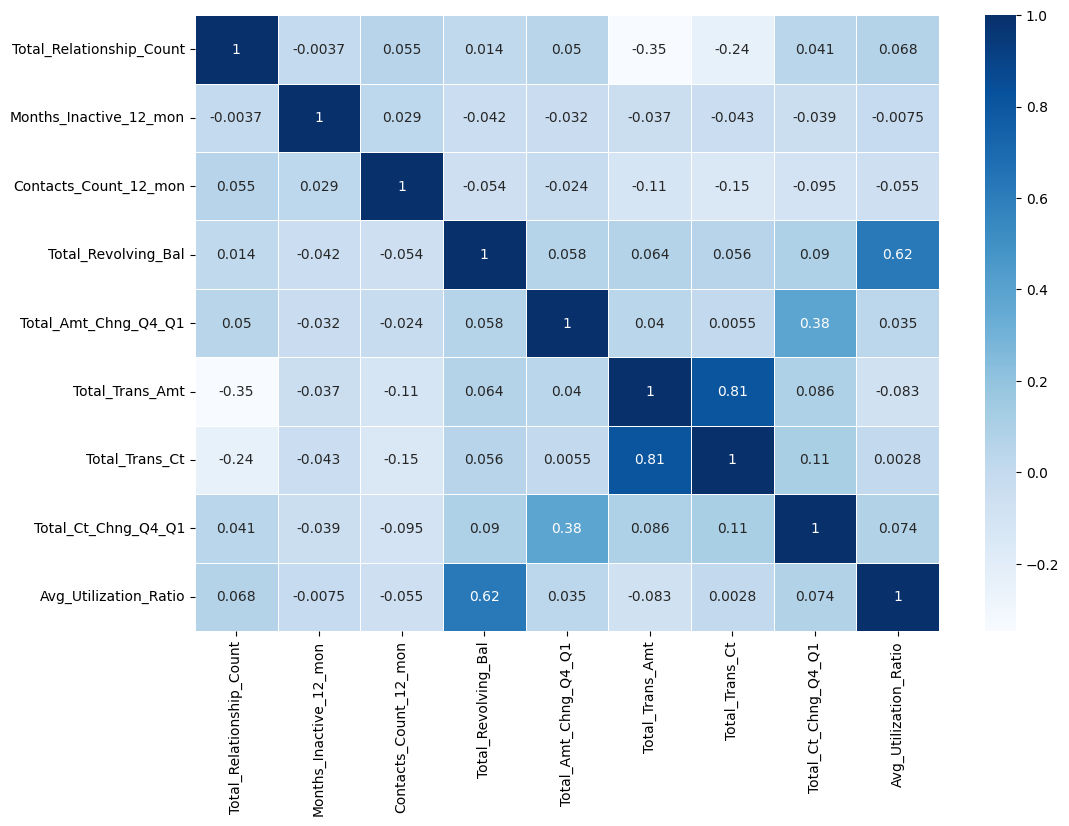

In [8]:
correlation_map(data_Num[col3], '')

In [9]:
col3

['Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Total_Revolving_Bal',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

Total_Revolving_Bal - Avg_Utilization_Ratio

Total_Amt_Chng_Q4_Q1 - Total_Ct_Chng_Q4_Q1

Total_Trans_Amt - Total_Trans_Ct

Total_Trans_Ct - Total_Ct_Chng_Q4_Q1

In [11]:
data_Num.columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'churn_flag', 'Gender'],
      dtype='object')

In [12]:
features = ['Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct', 'Avg_Utilization_Ratio', 'churn_flag', 'Gender']

In [13]:
data_num_new = data_Num[features]
data_num_new.head()

,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Avg_Utilization_Ratio,churn_flag,Gender
0,5,1,3,1.335,42,0.061,0,M
1,6,1,2,1.541,33,0.105,0,F
2,4,1,0,2.594,20,0.000,0,M
3,3,4,1,1.405,20,0.760,0,F
4,5,1,0,2.175,28,0.000,0,M


In [ ]:
SaveDataFrame(data_num_new,'numerical_features_new_select')

In [19]:
data_num_new.columns

Index(['Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct',
       'Avg_Utilization_Ratio', 'churn_flag', 'Gender'],
      dtype='object')

### Calculating measures of central tendency

In [18]:
d_n = catchPath('data/numerical_features_new_select.xlsx')
d_n

'/ML/data/numerical_features_new_select.xlsx'

In [26]:
df_n = pd.read_excel(d_n)
df_n.head()

,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Avg_Utilization_Ratio,churn_flag,Gender
0,5,1,3,1.335,42,0.061,0,M
1,6,1,2,1.541,33,0.105,0,F
2,4,1,0,2.594,20,0.000,0,M
3,3,4,1,1.405,20,0.760,0,F
4,5,1,0,2.175,28,0.000,0,M


In [20]:
df_n.columns

Index(['Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct',
       'Avg_Utilization_Ratio', 'churn_flag', 'Gender'],
      dtype='object')

In [27]:
filter_0 = df_n['churn_flag'] == 0

In [31]:
filter_1 = df_n['churn_flag'] == 1

In [29]:
df_n_0 = df_n[filter_0]
df_n_0.head()

,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Avg_Utilization_Ratio,churn_flag,Gender
0,5,1,3,1.335,42,0.061,0,M
1,6,1,2,1.541,33,0.105,0,F
2,4,1,0,2.594,20,0.000,0,M
3,3,4,1,1.405,20,0.760,0,F
4,5,1,0,2.175,28,0.000,0,M


In [32]:
df_n_1 = df_n[filter_1]
df_n_1.head()

,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Avg_Utilization_Ratio,churn_flag,Gender
21,2,3,3,1.047,16,0.000,1,F
39,5,4,3,1.052,16,0.077,1,F
51,2,3,1,0.997,19,0.562,1,F
54,1,3,3,1.041,15,0.000,1,M
61,2,4,4,0.763,15,0.000,1,M


In [33]:
df_n_1.shape

(1627, 8)

In [35]:
df_n_0.shape

(8500, 8)

In [37]:
col_n_mean = ['Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct',
       'Avg_Utilization_Ratio']

In [38]:
df_n_1_mean = df_n_1[col_n_mean].mean()

In [40]:
df_n_1_mean

Total_Relationship_Count     3.279656
Months_Inactive_12_mon       2.693301
Contacts_Count_12_mon        2.972342
Total_Amt_Chng_Q4_Q1         0.694277
Total_Trans_Ct              44.933620
Avg_Utilization_Ratio        0.162475
dtype: float64

In [39]:
df_n_0_mean = df_n_0[col_n_mean].mean()

In [41]:
df_n_0_mean 

Total_Relationship_Count     3.914588
Months_Inactive_12_mon       2.273765
Contacts_Count_12_mon        2.356353
Total_Amt_Chng_Q4_Q1         0.772510
Total_Trans_Ct              68.672588
Avg_Utilization_Ratio        0.296412
dtype: float64

In [43]:
l0 = df_n_0_mean.index.to_list()
l0

['Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Ct',
 'Avg_Utilization_Ratio']

In [44]:
l1 = df_n_1_mean.index.to_list()
l1

['Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Ct',
 'Avg_Utilization_Ratio']